In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
data = pd.read_excel("countries.xlsx")
data.rename(columns={'country': 'Country'}, inplace=True)  
data

,Country
0,Argentina
1,Azerbaijan
2,Bangladesh
3,Brazil
4,Bulgaria
5,Chile
6,China
7,Colombia
8,Egypt
9,India


In [24]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7320\3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [25]:
merged = world.merge(data, how='inner', left_on='name', right_on='Country')

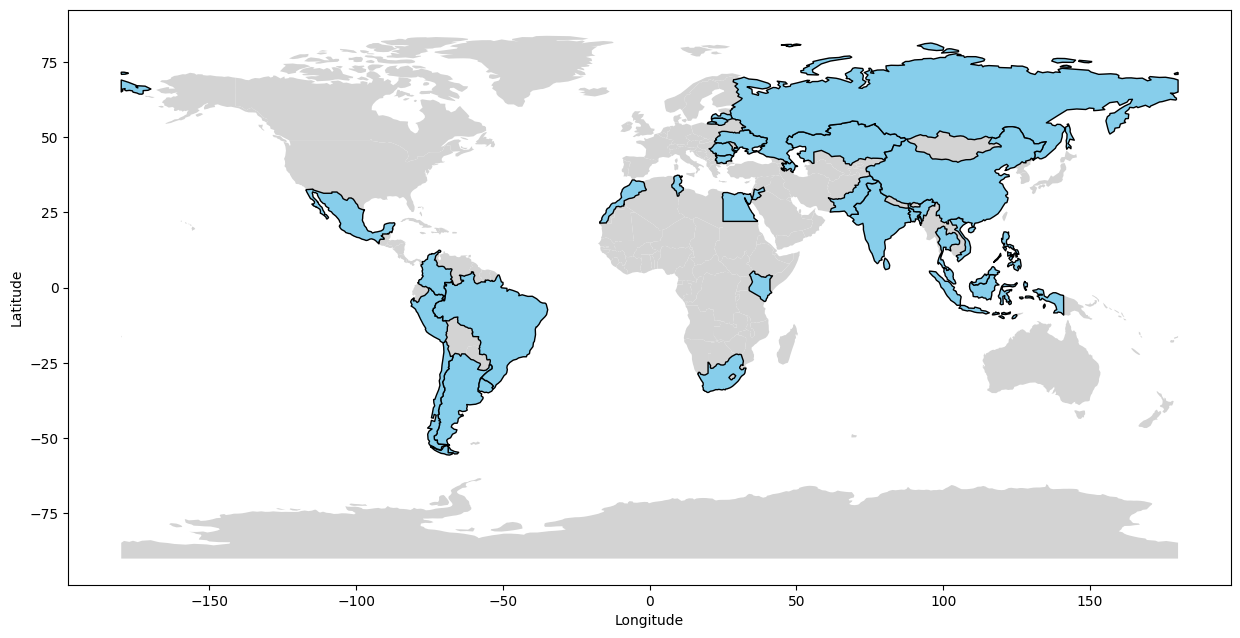

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')  # Plot the base map
merged.plot(ax=ax, color='skyblue', edgecolor='black')  
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig("polygon_world_map.png", format="png", dpi=300)  # Save with 300 dpi for high resolution
plt.show()

In [28]:
# Check for unmatched country names
csv_countries = set(data['Country'].unique())
world_countries = set(world['name'].unique())
unmatched_countries = csv_countries - world_countries

# Print unmatched countries if any
if unmatched_countries:
    print("Unmatched country names in your CSV file:", unmatched_countries)
else:
    print("All country names matched successfully.")

All country names matched successfully.
